# Sudoku Neural Network Training

Simple fully connected ReLU network for Sudoku solving - testbed for symbolic layer integration

In [37]:
import torch
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from nn import SudokuNet, SudokuDataset, SudokuTrainer, load_kaggle_data

## 1. Load and Prepare Data

Download the dataset from: https://www.kaggle.com/datasets/bryanpark/sudoku

Place `sudoku.csv` in the same directory as this notebook.

In [38]:
# Load data (use fewer samples for faster experimentation)
puzzles, solutions = load_kaggle_data('sudoku.csv', max_samples=50000)

print(f"Loaded {len(puzzles)} puzzles")
print(f"Example puzzle:  {puzzles[0]}")
print(f"Example solution: {solutions[0]}")

Loaded 50000 puzzles
Example puzzle:  004300209005009001070060043006002087190007400050083000600000105003508690042910300
Example solution: 864371259325849761971265843436192587198657432257483916689734125713528694542916378


In [39]:
# Split into train/validation
train_puzzles, val_puzzles, train_solutions, val_solutions = train_test_split(
    puzzles, solutions, test_size=0.2, random_state=834
)

print(f"Training samples: {len(train_puzzles)}")
print(f"Validation samples: {len(val_puzzles)}")

Training samples: 40000
Validation samples: 10000


In [40]:
# Create datasets and dataloaders
train_dataset = SudokuDataset(train_puzzles, train_solutions)
val_dataset = SudokuDataset(val_puzzles, val_solutions)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)

## 2. Create and Train Model

In [41]:
# Create model - experiment with different architectures
model = SudokuNet(hidden_sizes=[256, 256, 256])

# Create trainer
trainer = SudokuTrainer(model)
trainer.setup_optimizer(lr=1e-3, weight_decay=1e-5)

print(f"Model has {sum(p.numel() for p in model.parameters()):,} parameters")

Model has 339,929 parameters


In [42]:
# Train the model
trainer.train(train_loader, val_loader, epochs=50)

Training on cuda
Model parameters: 339,929


Epoch 1/50
  Train Loss: 2.1765
  Val Loss: 2.1566
  Cell Accuracy: 0.1491 (14.91%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 2/50
  Train Loss: 2.1462
  Val Loss: 2.1427
  Cell Accuracy: 0.1542 (15.42%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 3/50
  Train Loss: 2.1309
  Val Loss: 2.1332
  Cell Accuracy: 0.1563 (15.63%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 4/50
  Train Loss: 2.1169
  Val Loss: 2.1222
  Cell Accuracy: 0.1591 (15.91%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 5/50
  Train Loss: 2.1006
  Val Loss: 2.1071
  Cell Accuracy: 0.1639 (16.39%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 6/50
  Train Loss: 2.0826
  Val Loss: 2.0905
  Cell Accuracy: 0.1685 (16.85%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 7/50
  Train Loss: 2.0624
  Val Loss: 2.0710
  Cell Accuracy: 0.1751 (17.51%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 8/50
  Train Loss: 2.0384
  Val Loss: 2.0446
  Cell Accuracy: 0.1838 (18.38%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 9/50
  Train Loss: 2.0119
  Val Loss: 2.0186
  Cell Accuracy: 0.1931 (19.31%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 10/50
  Train Loss: 1.9837
  Val Loss: 1.9877
  Cell Accuracy: 0.2035 (20.35%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 11/50
  Train Loss: 1.9548
  Val Loss: 1.9581
  Cell Accuracy: 0.2150 (21.50%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 12/50
  Train Loss: 1.9251
  Val Loss: 1.9261
  Cell Accuracy: 0.2270 (22.70%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 13/50
  Train Loss: 1.8954
  Val Loss: 1.8985
  Cell Accuracy: 0.2384 (23.84%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 14/50
  Train Loss: 1.8687
  Val Loss: 1.8764
  Cell Accuracy: 0.2489 (24.89%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 15/50
  Train Loss: 1.8454
  Val Loss: 1.8578
  Cell Accuracy: 0.2551 (25.51%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 16/50
  Train Loss: 1.8264
  Val Loss: 1.8382
  Cell Accuracy: 0.2645 (26.45%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 17/50
  Train Loss: 1.8117
  Val Loss: 1.8293
  Cell Accuracy: 0.2676 (26.76%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 18/50
  Train Loss: 1.8004
  Val Loss: 1.8175
  Cell Accuracy: 0.2732 (27.32%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 19/50
  Train Loss: 1.7912
  Val Loss: 1.8088
  Cell Accuracy: 0.2762 (27.62%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 20/50
  Train Loss: 1.7831
  Val Loss: 1.8019
  Cell Accuracy: 0.2813 (28.13%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 21/50
  Train Loss: 1.7758
  Val Loss: 1.7935
  Cell Accuracy: 0.2840 (28.40%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 22/50
  Train Loss: 1.7701
  Val Loss: 1.7880
  Cell Accuracy: 0.2861 (28.61%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 23/50
  Train Loss: 1.7654
  Val Loss: 1.7886
  Cell Accuracy: 0.2880 (28.80%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 24/50
  Train Loss: 1.7598
  Val Loss: 1.7849
  Cell Accuracy: 0.2886 (28.86%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 25/50
  Train Loss: 1.7557
  Val Loss: 1.7754
  Cell Accuracy: 0.2932 (29.32%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 26/50
  Train Loss: 1.7510
  Val Loss: 1.7833
  Cell Accuracy: 0.2914 (29.14%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 27/50
  Train Loss: 1.7465
  Val Loss: 1.7720
  Cell Accuracy: 0.2961 (29.61%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 28/50
  Train Loss: 1.7426
  Val Loss: 1.7690
  Cell Accuracy: 0.2990 (29.90%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 29/50
  Train Loss: 1.7390
  Val Loss: 1.7647
  Cell Accuracy: 0.3009 (30.09%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 30/50
  Train Loss: 1.7341
  Val Loss: 1.7568
  Cell Accuracy: 0.3031 (30.31%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 31/50
  Train Loss: 1.7306
  Val Loss: 1.7582
  Cell Accuracy: 0.3036 (30.36%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 32/50
  Train Loss: 1.7266
  Val Loss: 1.7563
  Cell Accuracy: 0.3058 (30.58%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 33/50
  Train Loss: 1.7226
  Val Loss: 1.7493
  Cell Accuracy: 0.3077 (30.77%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 34/50
  Train Loss: 1.7198
  Val Loss: 1.7486
  Cell Accuracy: 0.3090 (30.90%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 35/50
  Train Loss: 1.7169
  Val Loss: 1.7453
  Cell Accuracy: 0.3109 (31.09%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 36/50
  Train Loss: 1.7114
  Val Loss: 1.7376
  Cell Accuracy: 0.3131 (31.31%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 37/50
  Train Loss: 1.7076
  Val Loss: 1.7345
  Cell Accuracy: 0.3164 (31.64%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 38/50
  Train Loss: 1.7045
  Val Loss: 1.7357
  Cell Accuracy: 0.3174 (31.74%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 39/50
  Train Loss: 1.7010
  Val Loss: 1.7288
  Cell Accuracy: 0.3180 (31.80%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 40/50
  Train Loss: 1.6967
  Val Loss: 1.7272
  Cell Accuracy: 0.3204 (32.04%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 41/50
  Train Loss: 1.6932
  Val Loss: 1.7199
  Cell Accuracy: 0.3239 (32.39%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 42/50
  Train Loss: 1.6891
  Val Loss: 1.7151
  Cell Accuracy: 0.3266 (32.66%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 43/50
  Train Loss: 1.6862
  Val Loss: 1.7158
  Cell Accuracy: 0.3254 (32.54%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 44/50
  Train Loss: 1.6819
  Val Loss: 1.7112
  Cell Accuracy: 0.3288 (32.88%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 45/50
  Train Loss: 1.6791
  Val Loss: 1.7088
  Cell Accuracy: 0.3302 (33.02%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 46/50
  Train Loss: 1.6748
  Val Loss: 1.7053
  Cell Accuracy: 0.3298 (32.98%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 47/50
  Train Loss: 1.6711
  Val Loss: 1.7012
  Cell Accuracy: 0.3324 (33.24%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 48/50
  Train Loss: 1.6674
  Val Loss: 1.6930
  Cell Accuracy: 0.3368 (33.68%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 49/50
  Train Loss: 1.6645
  Val Loss: 1.6931
  Cell Accuracy: 0.3373 (33.73%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 50/50
  Train Loss: 1.6614
  Val Loss: 1.6853
  Cell Accuracy: 0.3400 (34.00%)
  Puzzle Accuracy: 0.0000 (0.00%)



## 3. Visualize Training Progress

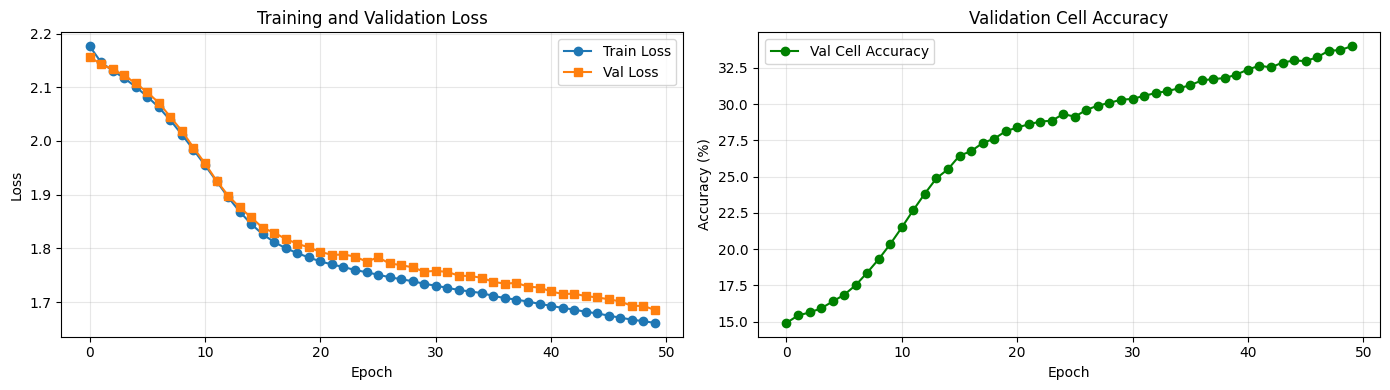

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Plot losses
ax1.plot(trainer.train_losses, label='Train Loss', marker='o')
ax1.plot(trainer.val_losses, label='Val Loss', marker='s')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot accuracy
ax2.plot([acc * 100 for acc in trainer.val_accuracies], label='Val Cell Accuracy', marker='o', color='green')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Validation Cell Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Test Predictions

In [44]:
def visualize_sudoku(puzzle_str, title="Sudoku"):
    """Visualize a sudoku puzzle."""
    puzzle = [int(c) for c in puzzle_str]
    fig, ax = plt.subplots(figsize=(6, 6))
    
    for i in range(9):
        for j in range(9):
            val = puzzle[i * 9 + j]
            if val != 0:
                ax.text(j + 0.5, 8.5 - i, str(val), 
                       ha='center', va='center', fontsize=16,
                       color='black' if val != 0 else 'gray')
    
    # Draw grid
    for i in range(10):
        lw = 2 if i % 3 == 0 else 0.5
        ax.axhline(i, color='black', linewidth=lw)
        ax.axvline(i, color='black', linewidth=lw)
    
    ax.set_xlim(0, 9)
    ax.set_ylim(0, 9)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    return fig

Puzzle:


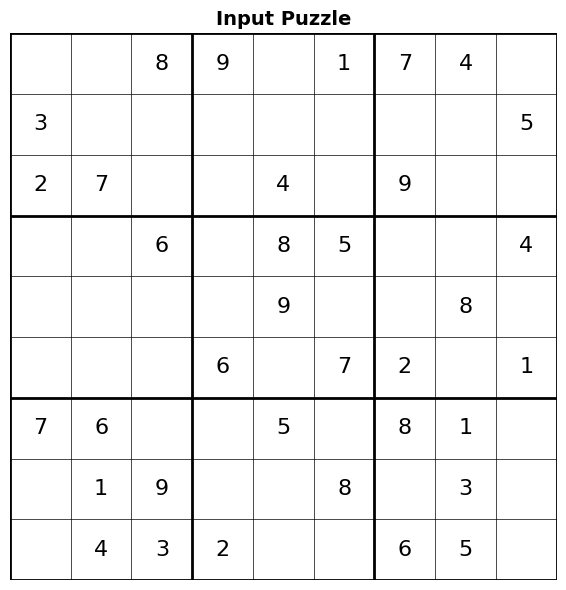


Prediction:


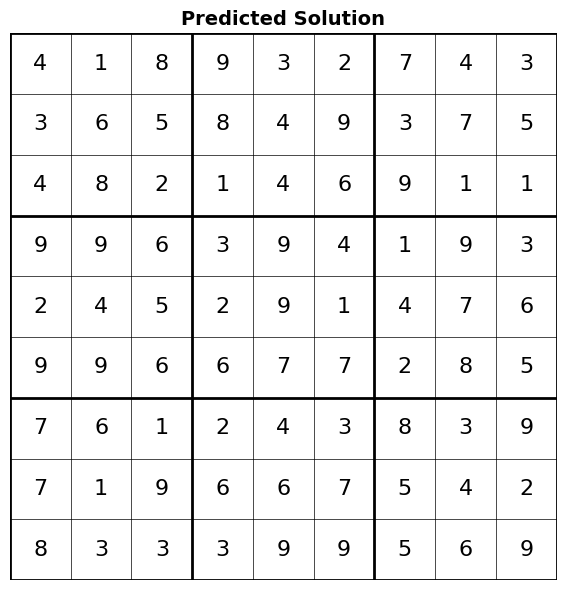


Ground Truth:


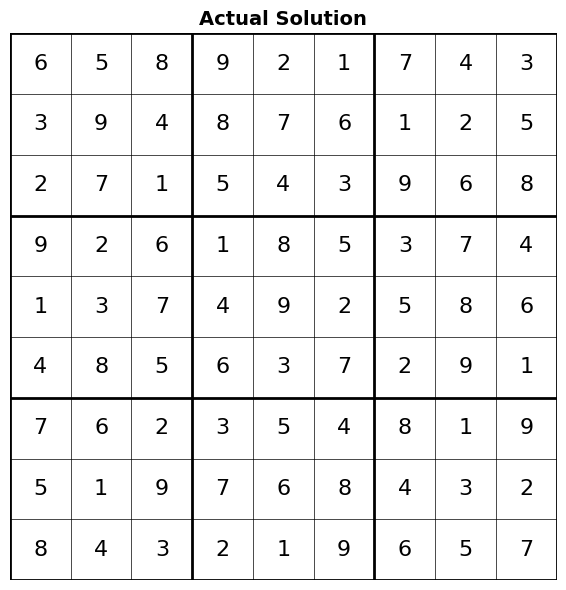


Cells correct: 28/81 (34.6%)


In [45]:
# Test on a validation example
idx = 0
test_puzzle = val_puzzles[idx]
test_solution = val_solutions[idx]
prediction = trainer.predict(test_puzzle)

print("Puzzle:")
visualize_sudoku(test_puzzle, "Input Puzzle")
plt.show()

print("\nPrediction:")
visualize_sudoku(prediction, "Predicted Solution")
plt.show()

print("\nGround Truth:")
visualize_sudoku(test_solution, "Actual Solution")
plt.show()

# Calculate accuracy
correct = sum(p == s for p, s in zip(prediction, test_solution))
print(f"\nCells correct: {correct}/81 ({correct/81*100:.1f}%)")

## 5. Save/Load Model

In [46]:
# Save the trained model
trainer.save('sudoku_model.pth')

Model saved to sudoku_model.pth


In [47]:
# Load a saved model
# new_model = SudokuNet(hidden_sizes=[512, 512, 512])
# new_trainer = SudokuTrainer(new_model)
# new_trainer.load('sudoku_model.pth')

## 6. Analyze Error Patterns

This is useful for understanding where to add symbolic layers

In [48]:
def check_constraints(solution_str):
    """Check if a solution satisfies Sudoku constraints."""
    solution = [int(c) for c in solution_str]
    board = [[solution[i*9 + j] for j in range(9)] for i in range(9)]
    
    violations = {'row': 0, 'col': 0, 'box': 0}
    
    # Check rows
    for row in board:
        if len(set(row)) != 9:
            violations['row'] += 1
    
    # Check columns
    for j in range(9):
        col = [board[i][j] for i in range(9)]
        if len(set(col)) != 9:
            violations['col'] += 1
    
    # Check 3x3 boxes
    for bi in range(3):
        for bj in range(3):
            box = [board[bi*3 + i][bj*3 + j] for i in range(3) for j in range(3)]
            if len(set(box)) != 9:
                violations['box'] += 1
    
    return violations

# Check constraint violations on predictions
total_violations = {'row': 0, 'col': 0, 'box': 0}
samples_to_check = min(100, len(val_puzzles))

for i in range(samples_to_check):
    pred = trainer.predict(val_puzzles[i])
    viols = check_constraints(pred)
    for k in viols:
        total_violations[k] += viols[k]

print(f"Constraint violations in {samples_to_check} predictions:")
print(f"  Row violations: {total_violations['row']}")
print(f"  Column violations: {total_violations['col']}")
print(f"  Box violations: {total_violations['box']}")

Constraint violations in 100 predictions:
  Row violations: 898
  Column violations: 898
  Box violations: 895
